Using data from this FiveThirtyEight post (http://fivethirtyeight.com/datalab/opinions-about-the-iran-deal-are-more-about-obama-than-iran/) , write code to calculate the correlation of the responses from the poll.
Respond to the story in your PR. Is this a good example of data journalism? Why or why not?

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [12]:
df=pd.read_csv('foxnewspoll.csv')

In [13]:
lm = smf.ols(formula="Favor_IranDeal~Approve_Obama",data=df).fit() 

In [14]:
intercept, slope = lm.params

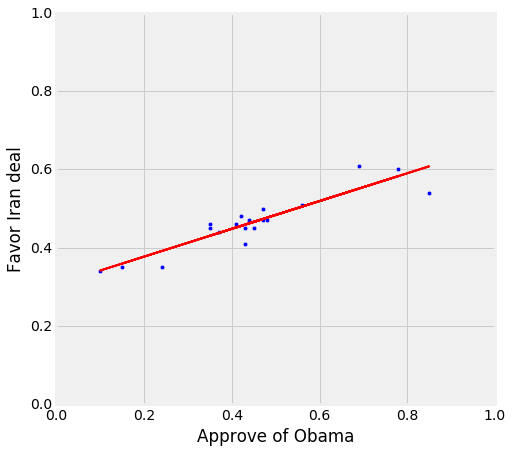

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
plt.style.use('fivethirtyeight')

ax = df.plot(ax = ax, kind='scatter', x="Approve_Obama", y="Favor_IranDeal")
plt.plot(df['Approve_Obama'],slope*df['Approve_Obama']+intercept, color="red", linewidth=2)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_ylabel("Favor Iran deal")
ax.set_xlabel("Approve of Obama")

In [16]:
df['Confident_IranNeg'] = df["Very confident_IranNeg"] + df['Somewhat confident_IranNeg']
lm2 = smf.ols(formula="Confident_IranNeg~Approve_Obama",data=df).fit() 

In [17]:
intercept, slope = lm2.params

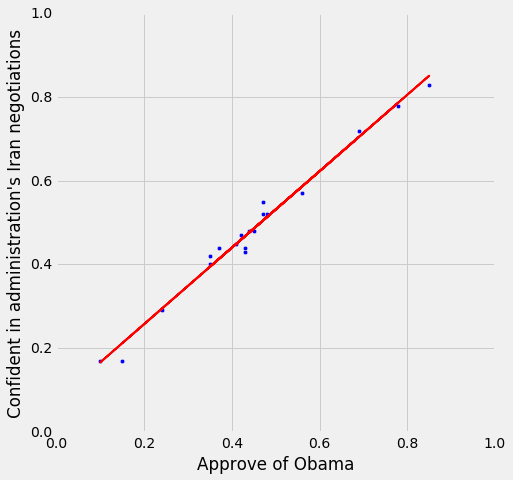

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
plt.style.use('fivethirtyeight')

ax = df.plot(ax = ax, kind='scatter', x="Approve_Obama", y="Confident_IranNeg")
plt.plot(df['Approve_Obama'],slope*df['Approve_Obama']+intercept, color="red", linewidth=2)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_ylabel("Confident in administration's Iran negotiations")
ax.set_xlabel("Approve of Obama")